# Marketing Visualization and Presentation for Data Bank  
<a id="contents"></a>

**Contents:**  

- [Project Objective](#projectobjective)  
- [Import Required Libraries](#importrequiredlibraries)  
- [Customer Nodes Visualization](#customernodesvisualization)  
- [Data Allocation Visualization](#dataallocationvisualization)
- [Project Summary](#projectsummary)  

<a id="projectobjective"></a>  
## Project Objective  

- Prepare visualizations of key metrics from the customer nodes and data allocation analysis.  
- Create marketing materials based on the obtained data.  
- Present the information in a structured format to attract investors and new Data Bank customers.  

**Source SQL Queries:**  
All SQL queries used in this project are available at the following link:  
[Original Queries](https://github.com/shdrn2402/Eight-week-SQL-challenge/tree/main/Case%20Study%20%234-Data%20Bank)  

<a id="importrequiredlibraries"></a>
## Import Required Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib.lines import Line2D
from sklearn.preprocessing import MinMaxScaler

<a id="customernodesvisualization"></a> 
## Customer Nodes Visualization

**Loading Required Data**

In [2]:
unique_nodes_amount_df = pd.read_csv("data/unique_nodes.csv")
unique_nodes_amount_df.loc[0]

unique_nodes_amount    5
Name: 0, dtype: int64

In [3]:
nodes_per_region_df = pd.read_csv("data/nodes_per_region.csv")
nodes_per_region_df.set_index("region_name")

,unique_nodes_amount
region_name,
Africa,5
America,5
Asia,5
Australia,5
Europe,5


In [4]:
customers_per_region_df = pd.read_csv("data/customers_per_region.csv")
customers_per_region_df.set_index("region_name")

,customers_amount
region_name,
Australia,110
America,105
Africa,102
Asia,95
Europe,88


In [5]:
avg_days_on_node_df = pd.read_csv("data/avg_days_on_node.csv")
avg_days_on_node_df.loc[0]

avg_days_on_node    23
Name: 0, dtype: int64

In [6]:
percentile_days_on_node_df = pd.read_csv("data/percentile_days_on_node.csv")
percentile_days_on_node_df.head()

,region_name,days_on_node
0,Africa,20
1,Africa,55
2,Africa,33
3,Africa,1
4,Africa,56


**Customer Distribution by Region Visualization**

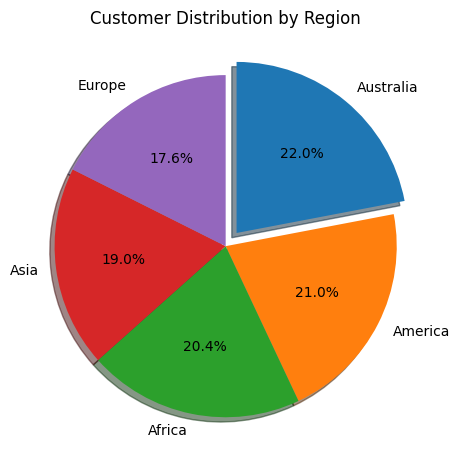

In [7]:
region_names = customers_per_region_df["region_name"]
customers_amount = customers_per_region_df["customers_amount"]
explode = (0.1, 0, 0, 0, 0)

fig, ax = plt.subplots()
ax.pie(x=customers_amount,
       explode=explode,
       labels=region_names,       
       autopct="%.1f%%",
       counterclock=False,
       shadow=True,
       startangle=90)
plt.title("Customer Distribution by Region")
plt.tight_layout()
plt.show()

**Distribution of Customer Node Reallocation Time Visualization**

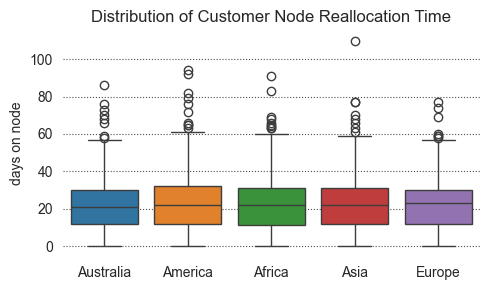

In [8]:
sns.set_style("whitegrid", {"grid.color": ".3", "grid.linestyle": ":"})
plt.figure(figsize=(5, 3))
plt.box(False)

palette = ["#2ca02c","#ff7f0e",  "#d62728", "#1f77b4", "#9467bd"]
order = list(customers_per_region_df["region_name"])

sns.boxplot(data=percentile_days_on_node_df,
            x="region_name",
            y="days_on_node",
            hue="region_name",
            palette=palette,
            order=order)

plt.title("Distribution of Customer Node Reallocation Time")
plt.xlabel("")
plt.ylabel("days on node")
plt.tight_layout()
plt.show()

## Data Allocation Visualization

In [9]:
# Loading required data
df = pd.read_csv("data/storage_volume.csv")
df.tail()

,customer_id,txn_date,cumulative_balance,simple_growth,compound_growth
39720,500,21/03/2020,2380,101.0849,101.0907
39721,500,22/03/2020,1426,101.1014,101.1074
39722,500,23/03/2020,1426,101.1178,101.1240
39723,500,24/03/2020,1426,101.1342,101.1406
39724,500,25/03/2020,2251,101.1507,101.1572


In [10]:
# Check for missing values in the dataset
df.isna().sum()

customer_id           0
txn_date              0
cumulative_balance    0
simple_growth         0
compound_growth       0
dtype: int64

In [11]:
# Check for correct data types
df.dtypes

customer_id             int64
txn_date               object
cumulative_balance      int64
simple_growth         float64
compound_growth       float64
dtype: object

In [12]:
df["txn_date"] = pd.to_datetime(df["txn_date"], format="%d/%m/%Y")
df.dtypes

customer_id                    int64
txn_date              datetime64[ns]
cumulative_balance             int64
simple_growth                float64
compound_growth              float64
dtype: object

**For visualization purposes, we use a single customer selected based on maximum service usage and a diverse balance history (including both positive and negative balances)**

In [13]:
# Finding customers with the longest usage period
df.groupby("customer_id")["txn_date"].count().sort_values(ascending=False).head(5)

customer_id
476    90
472    90
33     90
30     90
22     90
Name: txn_date, dtype: int64

In [14]:
# Filter data for customer with ID 472
df_to_plot = df[df["customer_id"] == 472].copy().reset_index(drop=True)
df_to_plot.sample(5)

,customer_id,txn_date,cumulative_balance,simple_growth,compound_growth
82,472,2020-04-09,-253,101.3644,101.3736
64,472,2020-03-22,-505,101.0685,101.0741
32,472,2020-02-19,-202,100.5425,100.5439
39,472,2020-02-26,-202,100.6575,100.6596
54,472,2020-03-12,-174,100.9041,100.9081


**Since balance values have a much larger range compared to storage volume, direct plotting would make storage volume changes barely noticeable. Normalization ensures both metrics are displayed on a comparable scale, improving visualization clarity.**

In [15]:
# Save variables before normalization to correctly determine the zero balance level after scaling
min_balance = df["cumulative_balance"].min()
max_balance = df["cumulative_balance"].max()
zero_balance = 0

scaler = MinMaxScaler()
df_to_plot[["cumulative_balance", "simple_growth", "compound_growth"]] = scaler.fit_transform(df_to_plot[["cumulative_balance", "simple_growth", "compound_growth"]])

# Normalize the zero balance value to maintain correct reference after scaling
zero_balance_norm = (zero_balance - min_balance) / (max_balance - min_balance)

df_to_plot.head()

,customer_id,txn_date,cumulative_balance,simple_growth,compound_growth
0,472,2020-01-18,0.853296,0.000000,0.000000
1,472,2020-01-19,0.608635,0.022237,0.022076
2,472,2020-01-20,0.608635,0.033322,0.033081
3,472,2020-01-21,0.608635,0.044474,0.044152
4,472,2020-01-22,0.608635,0.055559,0.055157


**To compare `simple growth`, and `compound growth` on the same timeline, we reshape the DataFrame into a long format. This allows plotting multiple metrics with a single categorical variable.**

In [18]:
dfl_to_plot = pd.melt(df_to_plot[["txn_date", "cumulative_balance", "simple_growth", "compound_growth"]],
                      id_vars="txn_date",
                      value_vars=("cumulative_balance", "simple_growth", "compound_growth"),
                      var_name="growth_method"
                     )
dfl_to_plot.head()

,txn_date,growth_method,value
0,2020-01-18,cumulative_balance,0.853296
1,2020-01-19,cumulative_balance,0.608635
2,2020-01-20,cumulative_balance,0.608635
3,2020-01-21,cumulative_balance,0.608635
4,2020-01-22,cumulative_balance,0.608635


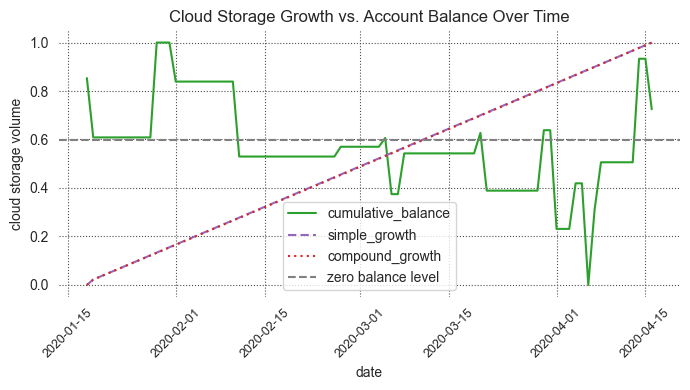

In [34]:
plt.figure(figsize=(7, 4))
plt.box(False)

palette = ["#2ca02c", "#9467bd", "#d62728"]

dashes = {
    "cumulative_balance": "",
    "simple_growth": (4, 2),
    "compound_growth": (1, 2),
}

sns.lineplot(data=dfl_to_plot,
             x="txn_date",
             y="value",
             hue="growth_method",
             palette=palette,
             style="growth_method",
             dashes=dashes
            )

# Add a horizontal line at the zero balance level
plt.axhline(y=zero_balance_norm, color="gray", linestyle="--")

# Retrieve current legend elements (lines and their labels)
handles, labels = plt.gca().get_legend_handles_labels()

# Create a line object for display in the legend
zero_balance_line = Line2D([0], [0], color="gray", linestyle="--", label="zero_balancelevel")
# Append the new line to the list of legend elements
handles.append(zero_balance_line)
labels.append("zero balance level")

plt.legend(handles=handles, labels=labels)
plt.title("Cloud Storage Growth vs. Account Balance Over Time")
plt.xlabel("date")
plt.xticks(rotation=45, fontsize=9)
plt.ylabel("cloud storage volume")


plt.tight_layout()
plt.show()